# Story 7 - Where Do Strategic Minerals Come From?

The US Geological Survey publishes a list of Strategic Minerals ( https://www.usgs.gov/news/national-news-release/us-geological-survey-releases-2022-list-critical-minerals ). Having a secure supply of these minerals is essential to our security and economic prosperity. However many of these minerals are sourced from outside of the US. This assignment is to develop a reference catalog of the source or sources of each of these minerals and a judgement on the reliability of each source under stressed circumstance (e.g. war, economic crisis, etc.)
Notes:

1. You will need to identify a source or sources for each of the minerals in the 2022 List of Critical Minerals

2. You will need to categorize each source country as an ally, a competitor or a neutral party.

3. You will need to develop data visualizations that tell the story of source dependency and shortfall impact.



# Introduction

In 2022, the  United States Geological Survey (USGS) published a list of "Strategic Minerals" that are essential to ensuring the future security and economic prosperity of the US. This assignment will look into the countries where these minerals are sourced and the reliability of these sources under stressed circumstances. This involves categorizing each source country as an ally, competitor, or neutral party based on current foreign relations policy.  



List of critical minerals: https://www.usgs.gov/news/national-news-release/us-geological-survey-releases-2022-list-critical-minerals

Forein relations data: https://en.wikipedia.org/wiki/Foreign_relations_of_the_United_States#Current


Countries by mineral production: https://pubs.usgs.gov/periodicals/mcs2024/mcs2024.pdf (page 27)

# Data Preparation



In [58]:
#pip install geopandas matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [59]:
mineral = pd.read_csv('https://raw.githubusercontent.com/LeJQC/MSDS/main/DATA%20608/Story%207/minerals.csv')

In [60]:
mineral.head()

,Mineral
0,Aluminum
1,Antimony
2,Arsenic
3,Barite
4,Beryllium


In [61]:
alliance = pd.read_csv('https://raw.githubusercontent.com/LeJQC/MSDS/main/DATA%20608/Story%207/country_alliance.csv')

In [62]:
df = pd.read_csv('https://raw.githubusercontent.com/LeJQC/MSDS/main/DATA%20608/Story%207/countries_and_minerals.csv')

In [63]:
df = df.drop(df.columns[-1], axis=1)

In [64]:
alliance.head()

,Countries,Alliance
0,United States,Ally
1,United Kingdom,Ally
2,France,Ally
3,Italy,Ally
4,Canada,Ally


In [65]:
df = df.rename(columns={'Largest producer' : 'Countries', 'Metal' : 'Mineral'})

In [66]:
merged_df = mineral.merge(df, on='Mineral')

In [67]:
merged_df = merged_df.merge(alliance, on='Countries', how='left')

In [68]:
merged_df

,Mineral,Countries,Alliance
0,Arsenic,India,Ally
1,Barite,India,Ally
2,Beryllium,United States,Ally
3,Bismuth,China,Competitor
4,Chromium,South Africa,Ally
5,Cobalt,Congo,Ally
6,Fluorspar,China,Competitor
7,Gallium,China,Competitor
8,Germanium,China,Competitor
9,Graphite,China,Competitor


# Data Visualization

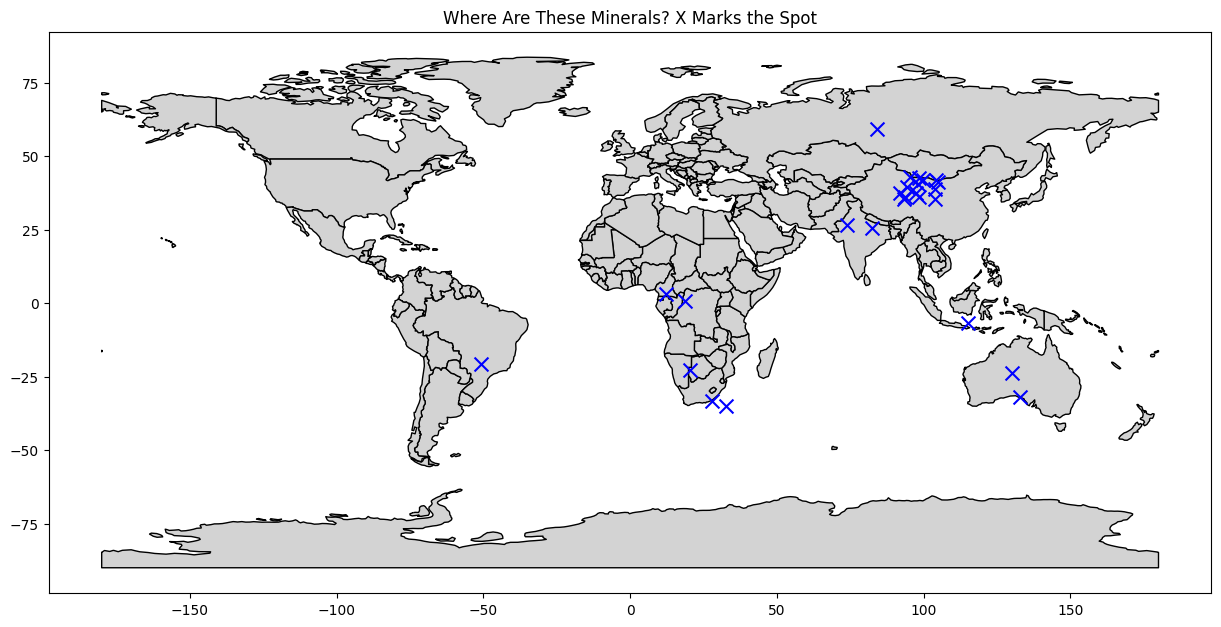

In [69]:
world['name'] = world['name'].str.title()
merged_df['Countries'] = merged_df['Countries'].str.title()

merged = world.set_index('name')

merged['color'] = 'lightgray'

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

merged.plot(color=merged['color'], edgecolor='black', ax=ax)

def jitter(x, scale=7):
    return x + np.random.uniform(-scale, scale)

for idx, row in merged_df.iterrows():
    country = row['Countries']
    if country in merged.index:
        rep_point = merged.loc[country].geometry.representative_point()
        plt.scatter(jitter(rep_point.x), jitter(rep_point.y), marker='x', color='blue',s=100)

plt.title('Where Are These Minerals? X Marks the Spot')
plt.show()


<Figure size 640x480 with 0 Axes>

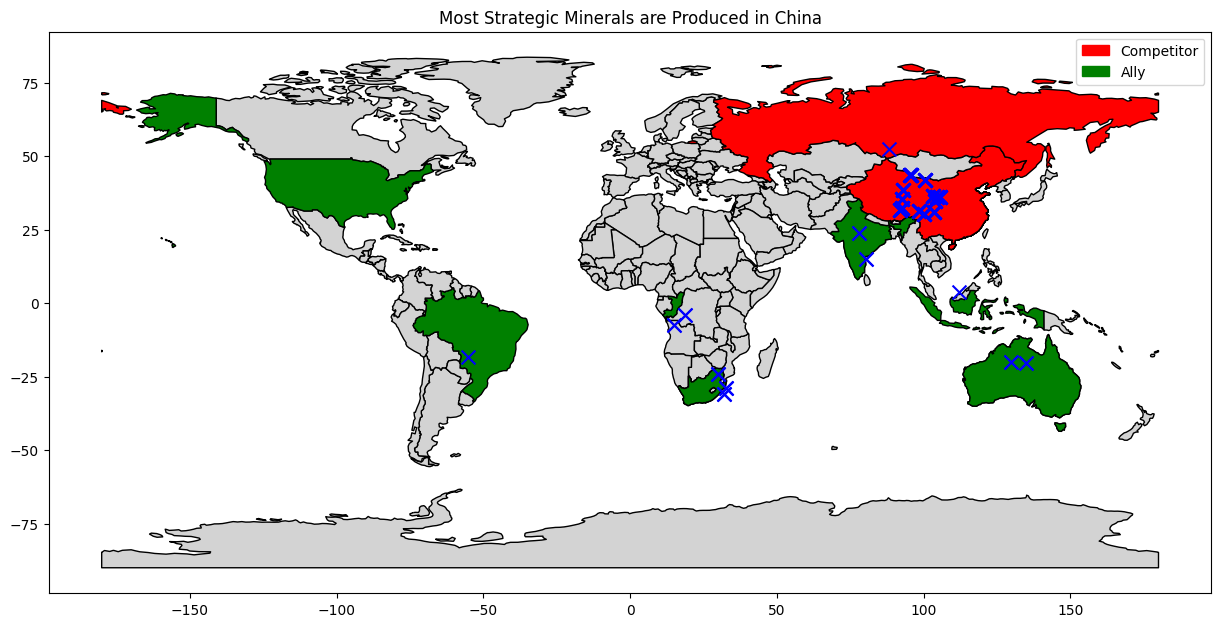

In [70]:
world['name'] = world['name'].str.title()
merged_df['Countries'] = merged_df['Countries'].str.title()

merged = world.set_index('name').join(merged_df.set_index('Countries'))

color_dict = {'Ally': 'green', 'Competitor': 'red'}

merged['color'] = merged['Alliance'].map(color_dict)

merged['color'].fillna('lightgray', inplace=True)
merged.plot(color=merged['color'], edgecolor='black', ax=ax)

us_name = next((index for index in merged.index if 'United States' in index), None)
if us_name:
    merged.loc[us_name, 'color'] = 'green'

fig, ax = plt.subplots(1, 1, figsize=(15 , 10))

merged.plot(color=merged['color'], edgecolor='black', ax=ax)

for idx, row in merged_df.iterrows():
    country = row['Countries']
    if country in merged.index:
        rep_point = merged.loc[country].geometry.representative_point()
        plt.scatter(jitter(rep_point.x), jitter(rep_point.y), marker='x', color='blue',s=100)

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Competitor')
green_patch = mpatches.Patch(color='green', label='Ally')
plt.legend(handles=[red_patch, green_patch])

plt.title('Most Strategic Minerals are Produced in China')
plt.show()

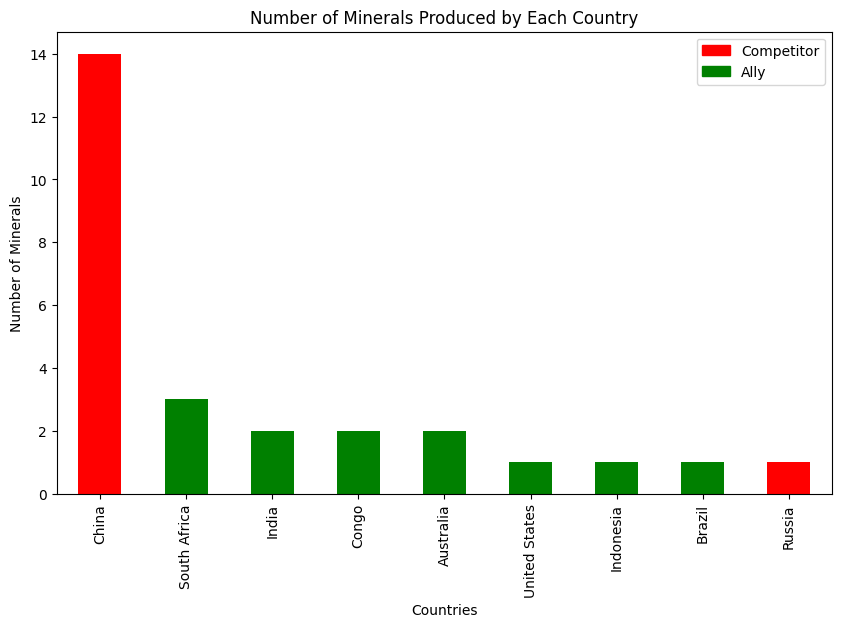

In [76]:
mineral_counts = merged_df['Countries'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))

country_colors = merged_df.drop_duplicates('Countries')[['Countries', 'Alliance']].copy()
country_colors['color'] = country_colors['Alliance'].map(color_dict)

colors = country_colors.set_index('Countries')['color'].reindex(mineral_counts.index)

mineral_counts.plot(kind='bar', ax=ax, color=colors)

ax.set_title('Number of Strategic Minerals Produced by Each Country')
ax.set_xlabel('Countries')
ax.set_ylabel('Number of Minerals')

red_patch = mpatches.Patch(color='red', label='Competitor')
green_patch = mpatches.Patch(color='green', label='Ally')
plt.legend(handles=[red_patch, green_patch])

plt.show()

# Conclusion

Overall, this visual analysis shows that most strategic minerals are produced in China, a country that has strained relations with the US. Of the 50 minearls listed by in the US Geological Survey, 14 or 28% of them are sourced in China. This could be problematic as it creates a significant dependency on a single country for critical resources. If an event were to occur that causes tension between the US and China, the availiabilty of these minerals could be at risk, which will impact industries that rely on these minerals.

On the other hand, ally countries like Austria, South Africa, Brazil, and Indonesia also produce strategic minerals. Although these countries individually do not produce as many minerals as China, when combined, their resources add up to a total that is comparable to China’s production. This diversified production from allies reduces the potential impact of a supply disruption from any single country.